In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import read_csv
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import os

In [21]:
base_path = r'D:\University Data\8 semester\Lab Machine learning\open ended lab'


building_data = pd.read_csv(os.path.join(base_path, 'building_2.csv'))
weather_data = pd.read_csv(os.path.join(base_path, 'weather.csv'))
pricing_data = pd.read_csv(os.path.join(base_path, 'pricing.csv'))
carbon_data = pd.read_csv(os.path.join(base_path, 'carbon_intensity.csv'))


combined_data = pd.concat([
    building_data, 
    weather_data, 
    pricing_data, 
    carbon_data
], axis=1)

# Save combined data to CSV
combined_data.to_csv(os.path.join(base_path, 'merged_citylearn_data.csv'), index=False)

print("Data merged successfully!")

Data merged successfully!


In [22]:
base_path = r'D:\University Data\8 semester\Lab Machine learning\open ended lab'
df = pd.read_csv(os.path.join(base_path, 'merged_citylearn_data.csv'))

# Remove specific columns by name
columns_to_remove = [
    'indoor_dry_bulb_temperature',
    'average_unmet_cooling_setpoint_difference',
    'indoor_relative_humidity'
]
df_cleaned = df.drop(columns=columns_to_remove)


df_cleaned.to_csv(os.path.join(base_path, 'cleaned_citylearn_data.csv'), index=False)
print("Selected columns removed and saved to cleaned_citylearn_data.csv")


Selected columns removed and saved to cleaned_citylearn_data.csv


In [23]:
base_path = r'D:\University Data\8 semester\Lab Machine learning\open ended lab'
df = pd.read_csv(os.path.join(base_path, 'cleaned_citylearn_data.csv'))
df.head()

,month,hour,day_type,daylight_savings_status,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,outdoor_dry_bulb_temperature,...,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3,carbon_intensity
0,7,24,7,0,2.188750,0.0,0.0,0.0,0.0,20.0,...,964.0,0.0,100.0,815.0,0.0,0.22,0.22,0.22,0.22,0.170724
1,8,1,1,0,1.370667,0.0,0.0,0.0,0.0,20.1,...,966.0,0.0,444.0,747.0,0.0,0.22,0.22,0.22,0.22,0.157319
2,8,2,1,0,1.101250,0.0,0.0,0.0,0.0,19.7,...,683.0,0.0,592.0,291.0,0.0,0.22,0.22,0.22,0.22,0.154503
3,8,3,1,0,0.543217,0.0,0.0,0.0,0.0,19.3,...,522.0,0.0,491.0,153.0,0.0,0.22,0.22,0.22,0.22,0.150945
4,8,4,1,0,0.542833,0.0,0.0,0.0,0.0,18.9,...,444.0,0.0,734.0,174.0,0.0,0.22,0.22,0.54,0.22,0.151820


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   month                                     8760 non-null   int64  
 1   hour                                      8760 non-null   int64  
 2   day_type                                  8760 non-null   int64  
 3   daylight_savings_status                   8760 non-null   int64  
 4   non_shiftable_load                        8760 non-null   float64
 5   dhw_demand                                8760 non-null   float64
 6   cooling_demand                            8760 non-null   float64
 7   heating_demand                            8760 non-null   float64
 8   solar_generation                          8760 non-null   float64
 9   outdoor_dry_bulb_temperature              8760 non-null   float64
 10  outdoor_relative_humidity           

In [25]:
df.describe()

,month,hour,day_type,daylight_savings_status,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,outdoor_dry_bulb_temperature,...,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3,carbon_intensity
count,8760.000000,8760.000000,8760.000000,8760.0,8.760000e+03,8760.0,8760.0,8760.0,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,6.526027,12.500000,3.992466,0.0,1.067763e+00,0.0,0.0,0.0,154.774259,16.837454,...,208.282192,208.282192,201.231507,201.231507,201.231507,0.273131,0.273131,0.273131,0.273131,0.156531
std,3.448048,6.922582,2.003522,0.0,8.735457e-01,0.0,0.0,0.0,226.196434,3.564816,...,292.799407,292.799407,296.193301,296.193301,296.193301,0.117803,0.117803,0.117803,0.117803,0.035370
min,1.000000,1.000000,1.000000,0.0,9.752910e-08,0.0,0.0,0.0,0.000000,5.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.210000,0.210000,0.210000,0.070383
25%,4.000000,6.750000,2.000000,0.0,4.281000e-01,0.0,0.0,0.0,0.000000,14.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.210000,0.210000,0.210000,0.131080
50%,7.000000,12.500000,4.000000,0.0,7.368583e-01,0.0,0.0,0.0,0.000000,17.200000,...,10.000000,10.000000,0.000000,0.000000,0.000000,0.210000,0.210000,0.210000,0.210000,0.154263
75%,10.000000,18.250000,6.000000,0.0,1.422371e+00,0.0,0.0,0.0,301.411460,19.400000,...,382.000000,382.000000,424.000000,424.000000,424.000000,0.220000,0.220000,0.220000,0.220000,0.178429
max,12.000000,24.000000,7.000000,0.0,6.843133e+00,0.0,0.0,0.0,786.083300,32.200000,...,1017.000000,1017.000000,953.000000,953.000000,953.000000,0.540000,0.540000,0.540000,0.540000,0.281796


In [26]:
print("Shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (8760, 30)

Missing values per column:
month                                       0
hour                                        0
day_type                                    0
daylight_savings_status                     0
non_shiftable_load                          0
dhw_demand                                  0
cooling_demand                              0
heating_demand                              0
solar_generation                            0
outdoor_dry_bulb_temperature                0
outdoor_relative_humidity                   0
diffuse_solar_irradiance                    0
direct_solar_irradiance                     0
outdoor_dry_bulb_temperature_predicted_1    0
outdoor_dry_bulb_temperature_predicted_2    0
outdoor_dry_bulb_temperature_predicted_3    0
outdoor_relative_humidity_predicted_1       0
outdoor_relative_humidity_predicted_2       0
outdoor_relative_humidity_predicted_3       0
diffuse_solar_irradiance_predicted_1        0
diffuse_solar_irradiance_predicted

In [27]:
base_path = r'D:\University Data\8 semester\Lab Machine learning\open ended lab'
data = pd.read_csv(os.path.join(base_path, 'cleaned_citylearn_data.csv'))
data.head()

,month,hour,day_type,daylight_savings_status,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,outdoor_dry_bulb_temperature,...,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3,carbon_intensity
0,7,24,7,0,2.188750,0.0,0.0,0.0,0.0,20.0,...,964.0,0.0,100.0,815.0,0.0,0.22,0.22,0.22,0.22,0.170724
1,8,1,1,0,1.370667,0.0,0.0,0.0,0.0,20.1,...,966.0,0.0,444.0,747.0,0.0,0.22,0.22,0.22,0.22,0.157319
2,8,2,1,0,1.101250,0.0,0.0,0.0,0.0,19.7,...,683.0,0.0,592.0,291.0,0.0,0.22,0.22,0.22,0.22,0.154503
3,8,3,1,0,0.543217,0.0,0.0,0.0,0.0,19.3,...,522.0,0.0,491.0,153.0,0.0,0.22,0.22,0.22,0.22,0.150945
4,8,4,1,0,0.542833,0.0,0.0,0.0,0.0,18.9,...,444.0,0.0,734.0,174.0,0.0,0.22,0.22,0.54,0.22,0.151820


In [28]:
def detect_outliers_iqr(data):
    q1 = data['non_shiftable_load'].quantile(0.25)
    q3 = data['non_shiftable_load'].quantile(0.75)
    IQR = q3 - q1
    lwr_bound = q1 - 1.5 * IQR
    upr_bound = q3 + 1.5 * IQR

    outliers = []
    idx_list = []

    for idx, val in data['non_shiftable_load'].items():
        if val < lwr_bound or val > upr_bound:
            outliers.append(val)
            idx_list.append(idx)

    data.loc[data['non_shiftable_load'] < lwr_bound, 'non_shiftable_load'] = np.nan
    data.loc[data['non_shiftable_load'] > upr_bound, 'non_shiftable_load'] = np.nan

    return outliers, data, idx_list


In [29]:
outliers, cleaned_citylearn_data_outlr, outlier_indices = detect_outliers_iqr(data)

print(f"Outliers detected in 'non_shiftable_load': {outliers}")
print(f"Number of outliers: {len(outliers)}")

missing_count = cleaned_citylearn_data_outlr['non_shiftable_load'].isnull().sum()
print(f"Missing values after replacing outliers: {missing_count}")


Outliers detected in 'non_shiftable_load': [2.9716666, 3.526, 3.8720334, 3.4493666, 3.3364167, 4.132075, 3.3299167, 3.2147334, 3.0735, 3.8458834, 3.2118, 2.9166167, 4.10505, 4.2035165, 3.1676, 3.0072334, 3.1345167, 4.1400332, 3.3352334, 4.131417, 4.12065, 4.267017, 2.9173667, 3.3530667, 3.4007084, 3.08955, 2.9646833, 3.0158, 3.5453, 3.4137166, 3.1045334, 3.7848, 3.7607334, 3.7683666, 3.8286834, 3.8826833, 3.2689166, 4.0649166, 3.0569167, 3.4117832, 2.9143333, 2.9142666, 3.50205, 3.2501333, 2.9589918, 3.31085, 3.9105666, 4.0357833, 3.9123, 3.0376666, 3.7770834, 2.96595, 3.0733, 3.3424833, 4.114267, 3.8571334, 3.6715333, 3.5341334, 3.0956666, 4.072067, 3.5263333, 3.4754333, 3.7197666, 3.35725, 3.4101, 3.4190333, 4.07525, 2.9568, 4.136017, 3.9309332, 3.6669, 4.1215835, 4.2004833, 4.0320334, 3.4740167, 3.2539833, 3.1669333, 3.1994, 2.9445918, 3.4133167, 3.0079334, 3.13075, 3.6872666, 4.06025, 3.8667667, 3.3027833, 3.2992666, 3.8334832, 3.7755666, 3.1731, 3.06025, 3.1536334, 3.1398666, 3.80

In [30]:
cleaned_citylearn_data_outlr['non_shiftable_load'].interpolate(method='linear', inplace=True)

missing_after_interp = cleaned_citylearn_data_outlr['non_shiftable_load'].isnull().sum()
print(f"Missing values after interpolation: {missing_after_interp}")

Missing values after interpolation: 0


C:\Users\AFNAN AHMAD\AppData\Local\Temp\ipykernel_15452\187334014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_citylearn_data_outlr['non_shiftable_load'].interpolate(method='linear', inplace=True)


In [31]:
if missing_after_interp > 0:
    cleaned_citylearn_data_outlr['non_shiftable_load'].fillna(method='ffill', inplace=True)
    cleaned_citylearn_data_outlr['non_shiftable_load'].fillna(method='bfill', inplace=True)
    print(f"Missing values after forward/backward fill: {cleaned_citylearn_data_outlr['non_shiftable_load'].isnull().sum()}")

In [32]:
cleaned_citylearn_data_outlr.to_csv(r'D:\University Data\8 semester\Lab Machine learning\open ended lab\cleaned_citylearn_data_no_outliers.csv', index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [33]:
data = pd.read_csv(r'D:\University Data\8 semester\Lab Machine learning\open ended lab\cleaned_citylearn_data_no_outliers.csv')

# Drop specified columns
cols_to_drop = ['daylight_savings_status', 'dhw_demand', 'cooling_demand', 'heating_demand']
data.drop(columns=cols_to_drop, inplace=True)

data.to_csv(r'D:\University Data\8 semester\Lab Machine learning\open ended lab\cleaned_citylearn_data_no_outliers1.csv', index=False)

In [34]:
data.head()

,month,hour,day_type,non_shiftable_load,solar_generation,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_1,...,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3,carbon_intensity
0,7,24,7,2.188750,0.0,20.0,84.0,0.0,0.0,18.3,...,964.0,0.0,100.0,815.0,0.0,0.22,0.22,0.22,0.22,0.170724
1,8,1,1,1.370667,0.0,20.1,79.0,0.0,0.0,19.4,...,966.0,0.0,444.0,747.0,0.0,0.22,0.22,0.22,0.22,0.157319
2,8,2,1,1.101250,0.0,19.7,78.0,0.0,0.0,21.1,...,683.0,0.0,592.0,291.0,0.0,0.22,0.22,0.22,0.22,0.154503
3,8,3,1,0.543217,0.0,19.3,78.0,0.0,0.0,22.2,...,522.0,0.0,491.0,153.0,0.0,0.22,0.22,0.22,0.22,0.150945
4,8,4,1,0.542833,0.0,18.9,78.0,0.0,0.0,21.7,...,444.0,0.0,734.0,174.0,0.0,0.22,0.22,0.54,0.22,0.151820


In [35]:
data.shape

(8760, 26)

In [36]:
df = pd.read_csv(r'D:\University Data\8 semester\Lab Machine learning\open ended lab\cleaned_citylearn_data_no_outliers1.csv')

# Define new column order
ordered_columns = [
    'non_shiftable_load',

    'outdoor_dry_bulb_temperature_predicted_1',
    'outdoor_dry_bulb_temperature_predicted_2',
    'outdoor_dry_bulb_temperature_predicted_3',
    'outdoor_relative_humidity_predicted_1',
    'outdoor_relative_humidity_predicted_2',
    'outdoor_relative_humidity_predicted_3',
    'diffuse_solar_irradiance_predicted_1',
    'diffuse_solar_irradiance_predicted_2',
    'diffuse_solar_irradiance_predicted_3',
    'direct_solar_irradiance_predicted_1',
    'direct_solar_irradiance_predicted_2',
    'direct_solar_irradiance_predicted_3',
    'electricity_pricing_predicted_1',
    'electricity_pricing_predicted_2',
    'electricity_pricing_predicted_3',

    'hour',
    'day_type',
    'electricity_pricing',
    'outdoor_dry_bulb_temperature',
    'solar_generation',
    'carbon_intensity',
    'outdoor_relative_humidity',
    'diffuse_solar_irradiance',
    'direct_solar_irradiance',
    'month'
]

df = df[ordered_columns]

# Save reordered data
df.to_csv(r'D:\University Data\8 semester\Lab Machine learning\open ended lab\citylearn_data_reordered.csv', index=False)


In [37]:
df.head()

,non_shiftable_load,outdoor_dry_bulb_temperature_predicted_1,outdoor_dry_bulb_temperature_predicted_2,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,...,hour,day_type,electricity_pricing,outdoor_dry_bulb_temperature,solar_generation,carbon_intensity,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,month
0,2.188750,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,...,24,7,0.22,20.0,0.0,0.170724,84.0,0.0,0.0,7
1,1.370667,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,...,1,1,0.22,20.1,0.0,0.157319,79.0,0.0,0.0,8
2,1.101250,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,...,2,1,0.22,19.7,0.0,0.154503,78.0,0.0,0.0,8
3,0.543217,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,...,3,1,0.22,19.3,0.0,0.150945,78.0,0.0,0.0,8
4,0.542833,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,...,4,1,0.22,18.9,0.0,0.151820,78.0,0.0,0.0,8


In [38]:
data1 = pd.read_csv(r'D:\University Data\8 semester\Lab Machine learning\open ended lab\citylearn_data_reordered.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [39]:
# Columns to exclude from outlier detection
exclude_cols = ['non_shiftable_load', 'hour', 'month', 'day_type']

# Select numeric columns excluding specified columns
columns_to_check = [col for col in data1.columns 
                    if col not in exclude_cols and pd.api.types.is_numeric_dtype(data1[col])]

print(f"Columns selected for outlier detection:\n{columns_to_check}")


Columns selected for outlier detection:
['outdoor_dry_bulb_temperature_predicted_1', 'outdoor_dry_bulb_temperature_predicted_2', 'outdoor_dry_bulb_temperature_predicted_3', 'outdoor_relative_humidity_predicted_1', 'outdoor_relative_humidity_predicted_2', 'outdoor_relative_humidity_predicted_3', 'diffuse_solar_irradiance_predicted_1', 'diffuse_solar_irradiance_predicted_2', 'diffuse_solar_irradiance_predicted_3', 'direct_solar_irradiance_predicted_1', 'direct_solar_irradiance_predicted_2', 'direct_solar_irradiance_predicted_3', 'electricity_pricing_predicted_1', 'electricity_pricing_predicted_2', 'electricity_pricing_predicted_3', 'electricity_pricing', 'outdoor_dry_bulb_temperature', 'solar_generation', 'carbon_intensity', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance']


In [40]:
def detect_and_handle_outliers_iqr(df, column):
    """
    Detects outliers in the given column using the IQR method,
    replaces them with NaN, and interpolates missing values.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: Found {outliers.shape[0]} outliers.")

    # Replace outliers with NaN
    df.loc[df[column] < lower_bound, column] = np.nan
    df.loc[df[column] > upper_bound, column] = np.nan

    # Interpolate missing values linearly
    df[column].interpolate(method='linear', inplace=True)

    # Fill remaining NaNs by forward and backward fill
    if df[column].isnull().sum() > 0:
        df[column].fillna(method='ffill', inplace=True)
        df[column].fillna(method='bfill', inplace=True)

    return df

In [41]:
# Process each column for outlier handling
for col in columns_to_check:
    data1 = detect_and_handle_outliers_iqr(data1, col)

print("Outlier handling completed for all selected columns.")

outdoor_dry_bulb_temperature_predicted_1: Found 35 outliers.
outdoor_dry_bulb_temperature_predicted_2: Found 35 outliers.
outdoor_dry_bulb_temperature_predicted_3: Found 35 outliers.
outdoor_relative_humidity_predicted_1: Found 379 outliers.
outdoor_relative_humidity_predicted_2: Found 379 outliers.
outdoor_relative_humidity_predicted_3: Found 379 outliers.
diffuse_solar_irradiance_predicted_1: Found 120 outliers.
diffuse_solar_irradiance_predicted_2: Found 120 outliers.
diffuse_solar_irradiance_predicted_3: Found 120 outliers.
direct_solar_irradiance_predicted_1: Found 0 outliers.
direct_solar_irradiance_predicted_2: Found 0 outliers.
direct_solar_irradiance_predicted_3: Found 0 outliers.
electricity_pricing_predicted_1: Found 1825 outliers.
electricity_pricing_predicted_2: Found 1825 outliers.
electricity_pricing_predicted_3: Found 1825 outliers.
electricity_pricing: Found 1825 outliers.
outdoor_dry_bulb_temperature: Found 35 outliers.
solar_generation: Found 19 outliers.
carbon_inte

C:\Users\AFNAN AHMAD\AppData\Local\Temp\ipykernel_15452\1113013717.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', inplace=True)
C:\Users\AFNAN AHMAD\AppData\Local\Temp\ipykernel_15452\1113013717.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Outlier handling completed for all selected columns.


C:\Users\AFNAN AHMAD\AppData\Local\Temp\ipykernel_15452\1113013717.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', inplace=True)


In [42]:
output_path = r'D:\University Data\8 semester\Lab Machine learning\open ended lab\cleaned_citylearn_data_all_outliers_handled.csv'
data1.to_csv(output_path, index=False)
print(f"Cleaned dataset saved successfully at:\n{output_path}")

Cleaned dataset saved successfully at:
D:\University Data\8 semester\Lab Machine learning\open ended lab\cleaned_citylearn_data_all_outliers_handled.csv


In [43]:
dt = pd.read_csv(r'D:\University Data\8 semester\Lab Machine learning\open ended lab\cleaned_citylearn_data_all_outliers_handled.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [44]:
# Calculate Pearson correlation of all columns with 'non_shiftable_load'
pearson_corr = dt.corrwith(dt["non_shiftable_load"], method="pearson")

print("Pearson correlation with 'non_shiftable_load':\n")
print(pearson_corr)

Pearson correlation with 'non_shiftable_load':

non_shiftable_load                          1.000000
outdoor_dry_bulb_temperature_predicted_1   -0.173300
outdoor_dry_bulb_temperature_predicted_2   -0.043102
outdoor_dry_bulb_temperature_predicted_3    0.037019
outdoor_relative_humidity_predicted_1       0.190672
outdoor_relative_humidity_predicted_2       0.050899
outdoor_relative_humidity_predicted_3       0.056455
diffuse_solar_irradiance_predicted_1       -0.295011
diffuse_solar_irradiance_predicted_2       -0.027432
diffuse_solar_irradiance_predicted_3       -0.036352
direct_solar_irradiance_predicted_1        -0.273973
direct_solar_irradiance_predicted_2        -0.026862
direct_solar_irradiance_predicted_3        -0.031885
electricity_pricing_predicted_1             0.134972
electricity_pricing_predicted_2             0.132658
electricity_pricing_predicted_3             0.132910
hour                                        0.372702
day_type                                    0.07904

In [45]:
print("Dataset shape:", dt.shape)

Dataset shape: (8760, 26)


In [46]:
print('kendall\n\n', dt.corrwith(dt["non_shiftable_load"], method="kendall"))

kendall

 non_shiftable_load                          1.000000
outdoor_dry_bulb_temperature_predicted_1   -0.143541
outdoor_dry_bulb_temperature_predicted_2   -0.040506
outdoor_dry_bulb_temperature_predicted_3   -0.019232
outdoor_relative_humidity_predicted_1       0.144424
outdoor_relative_humidity_predicted_2       0.025470
outdoor_relative_humidity_predicted_3       0.036985
diffuse_solar_irradiance_predicted_1       -0.276820
diffuse_solar_irradiance_predicted_2        0.020798
diffuse_solar_irradiance_predicted_3       -0.080720
direct_solar_irradiance_predicted_1        -0.264070
direct_solar_irradiance_predicted_2         0.015454
direct_solar_irradiance_predicted_3        -0.062150
electricity_pricing_predicted_1             0.053145
electricity_pricing_predicted_2             0.051649
electricity_pricing_predicted_3             0.052286
hour                                        0.266822
day_type                                    0.064050
electricity_pricing                 

In [47]:
print("Missing values before treatment:\n", dt.isnull().sum())

dt.fillna(dt.mean(numeric_only=True), inplace=True)
dt.fillna('missing', inplace=True)

Missing values before treatment:
 non_shiftable_load                          0
outdoor_dry_bulb_temperature_predicted_1    0
outdoor_dry_bulb_temperature_predicted_2    0
outdoor_dry_bulb_temperature_predicted_3    0
outdoor_relative_humidity_predicted_1       0
outdoor_relative_humidity_predicted_2       0
outdoor_relative_humidity_predicted_3       0
diffuse_solar_irradiance_predicted_1        0
diffuse_solar_irradiance_predicted_2        0
diffuse_solar_irradiance_predicted_3        0
direct_solar_irradiance_predicted_1         0
direct_solar_irradiance_predicted_2         0
direct_solar_irradiance_predicted_3         0
electricity_pricing_predicted_1             0
electricity_pricing_predicted_2             0
electricity_pricing_predicted_3             0
hour                                        0
day_type                                    0
electricity_pricing                         0
outdoor_dry_bulb_temperature                0
solar_generation                            0


In [48]:
from scipy import stats

def cap_outliers(df, column, threshold=3):
    z = np.abs(stats.zscore(df[column]))
    df[column] = np.where(z > threshold, df[column].median(), df[column])
    return df

# Select numeric columns excluding target
numerical_cols = dt.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('non_shiftable_load')  # exclude target

# Apply outlier capping on each column
for col in numerical_cols:
    dt = cap_outliers(dt, col)

In [49]:
# Cyclical encoding for temporal features
dt['hour_sin'] = np.sin(2 * np.pi * dt['hour'] / 24)
dt['hour_cos'] = np.cos(2 * np.pi * dt['hour'] / 24)
dt['month_sin'] = np.sin(2 * np.pi * dt['month'] / 12)
dt['month_cos'] = np.cos(2 * np.pi * dt['month'] / 12)

# Interaction term
dt['solar_price_interaction'] = dt['solar_generation'] * dt['electricity_pricing']

# Time-based aggregation example
dt['rolling_avg_load_24h'] = dt['non_shiftable_load'].rolling(24).mean().shift(1)


In [50]:
print(dt.columns)


Index(['non_shiftable_load', 'outdoor_dry_bulb_temperature_predicted_1',
       'outdoor_dry_bulb_temperature_predicted_2',
       'outdoor_dry_bulb_temperature_predicted_3',
       'outdoor_relative_humidity_predicted_1',
       'outdoor_relative_humidity_predicted_2',
       'outdoor_relative_humidity_predicted_3',
       'diffuse_solar_irradiance_predicted_1',
       'diffuse_solar_irradiance_predicted_2',
       'diffuse_solar_irradiance_predicted_3',
       'direct_solar_irradiance_predicted_1',
       'direct_solar_irradiance_predicted_2',
       'direct_solar_irradiance_predicted_3',
       'electricity_pricing_predicted_1', 'electricity_pricing_predicted_2',
       'electricity_pricing_predicted_3', 'hour', 'day_type',
       'electricity_pricing', 'outdoor_dry_bulb_temperature',
       'solar_generation', 'carbon_intensity', 'outdoor_relative_humidity',
       'diffuse_solar_irradiance', 'direct_solar_irradiance', 'month',
       'hour_sin', 'hour_cos', 'month_sin', 'month_cos

Correlation of features with non_shiftable_load:
 non_shiftable_load                          1.000000
hour                                        0.372702
electricity_pricing_predicted_3             0.261627
electricity_pricing                         0.257523
carbon_intensity                            0.250972
outdoor_relative_humidity_predicted_1       0.179775
month                                       0.083676
day_type                                    0.079046
outdoor_relative_humidity_predicted_3       0.070320
outdoor_relative_humidity_predicted_2       0.049832
outdoor_dry_bulb_temperature                0.048773
outdoor_relative_humidity                   0.048714
outdoor_dry_bulb_temperature_predicted_3    0.035927
solar_generation                           -0.011958
diffuse_solar_irradiance_predicted_2       -0.026382
direct_solar_irradiance_predicted_2        -0.026862
direct_solar_irradiance_predicted_3        -0.031885
diffuse_solar_irradiance_predicted_3       -0.035

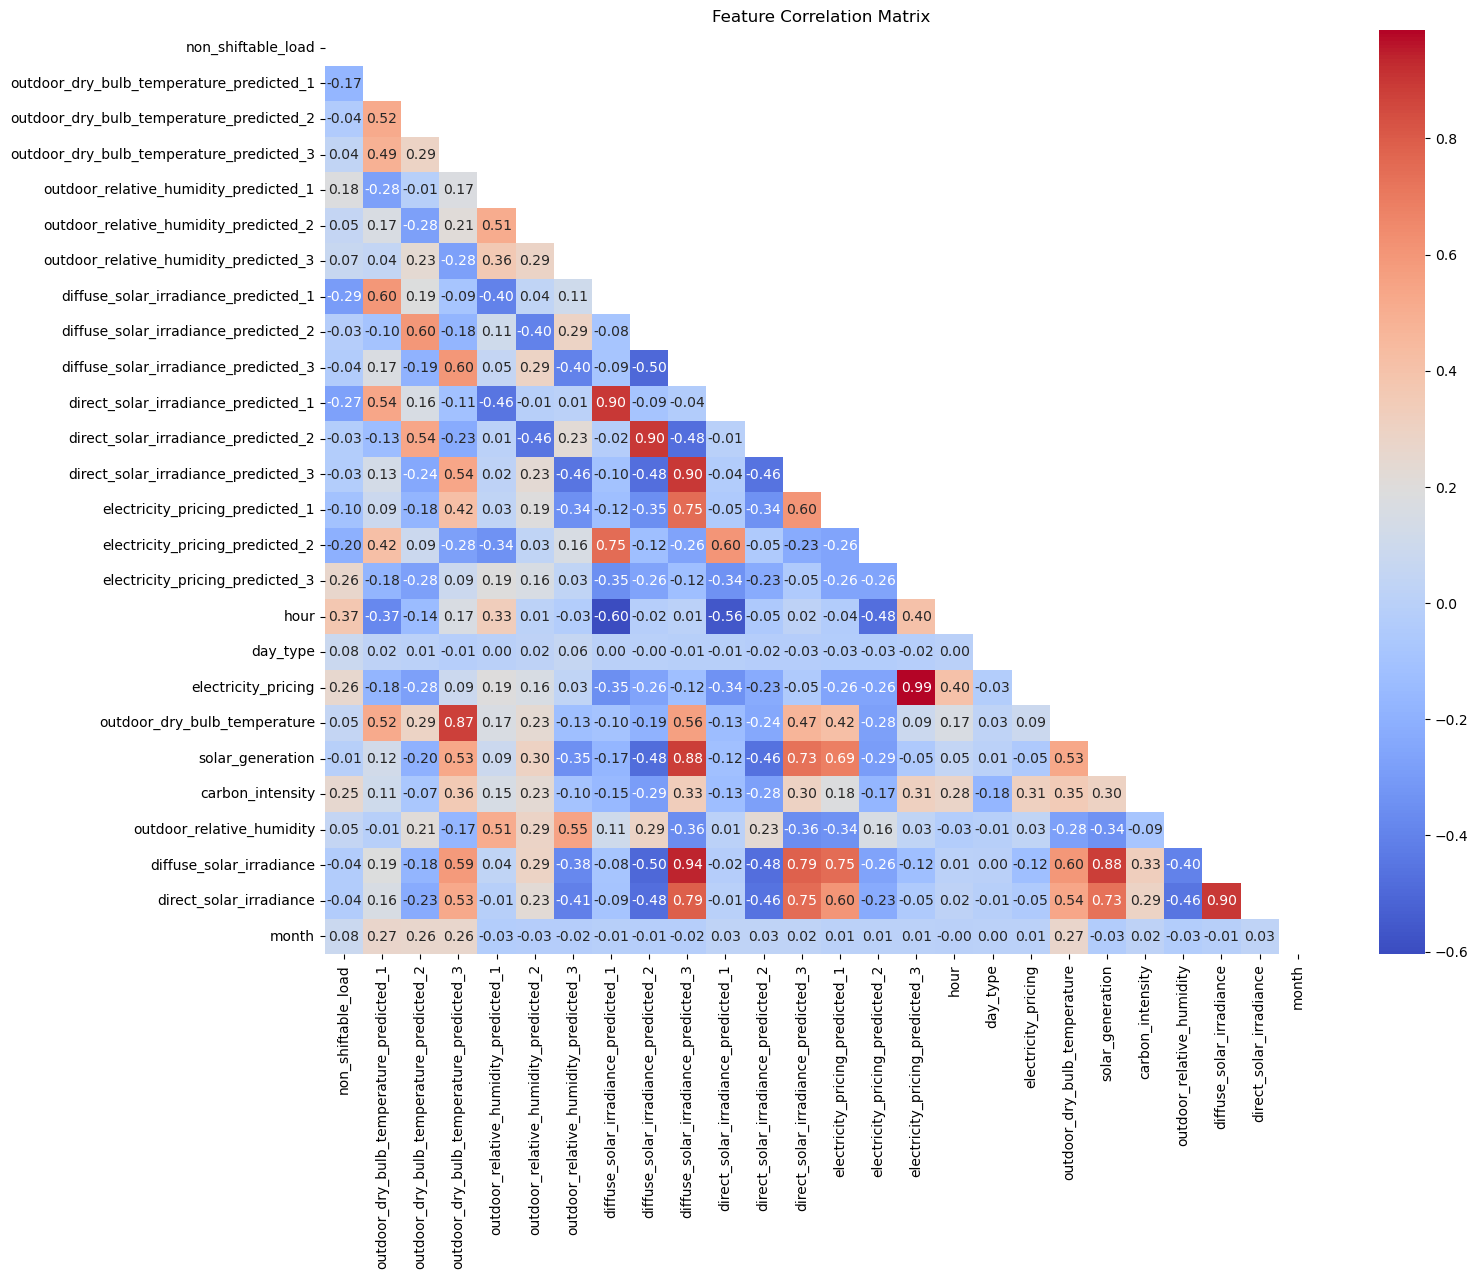

Dropping highly correlated features: {'electricity_pricing', 'diffuse_solar_irradiance'}


In [51]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Sort correlations with target column 'non_shiftable_load'
target_corr = corr_matrix['non_shiftable_load'].sort_values(ascending=False)
print("Correlation of features with non_shiftable_load:\n", target_corr)

# Plot correlation heatmap (upper triangle masked)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated features (correlation > 0.9)
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            correlated_features.add(corr_matrix.columns[i])

print("Dropping highly correlated features:", correlated_features)

# Drop these columns from df
df.drop(columns=correlated_features, inplace=True)
